# Bank Marketing

The client bank *XYZ* is running a direct marketing (phone calls) campaign. The classification goal is to predict if the client will subscribe a term deposit or not.

The data is obtained from [UCI Machine Learning repository]( http://mlr.cs.umass.edu/ml/datasets/Bank+Marketing)

### Attribute Information:

#### bank client data:
- **age**: (numeric)
- **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital** : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- **education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate' ,'professional.course', 'university.degree', 'unknown')
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- **contact**: contact communication type (categorical: 'cellular', 'telephone') 
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day**: last contact day of the month (numerical: 1, 2, 3, 4, ...)
- **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
- **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')



In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline to plot inline
%matplotlib inline 
#? before plt.style.use to check what's available
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
#2. import data set
df = pd.read_csv("../data/bank.csv")

In [9]:
#3. Display first few records
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
#4. check column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [14]:
#5. Find column types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [18]:
#import type of the datatype (df)
#5. Find number of rows and columns
df.shape

(11162, 17)

In [15]:
#5. Find number of rows and columns (shape)
df.shape

(11162, 17)

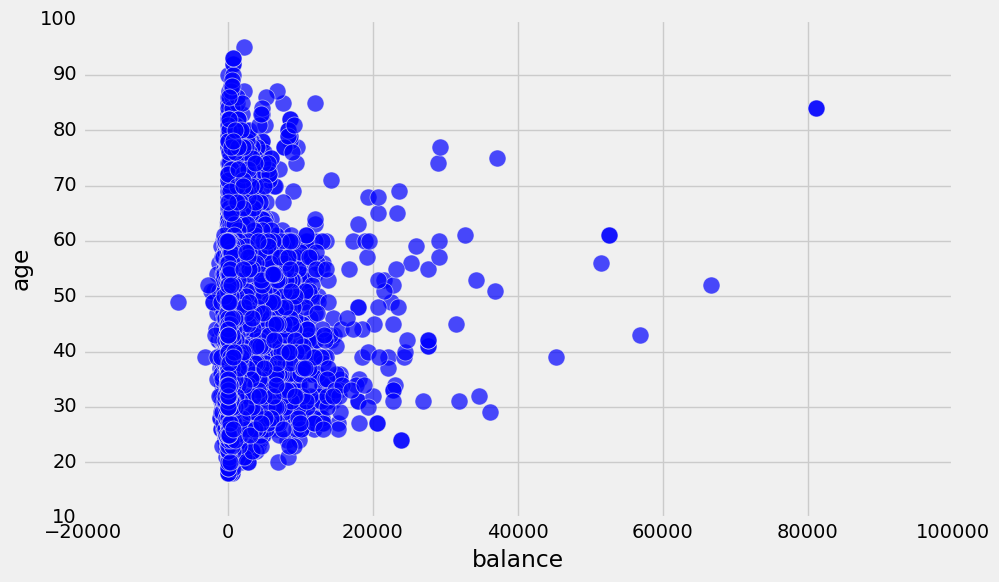

In [27]:
#plot a scatter plot, 
#with x axis showing the age 
#and y axis the balance
#s is size of the circle
#alpha is the transparency of the circle
df.plot(kind="scatter", x = "balance", y = "age", s=150, alpha = 0.7)

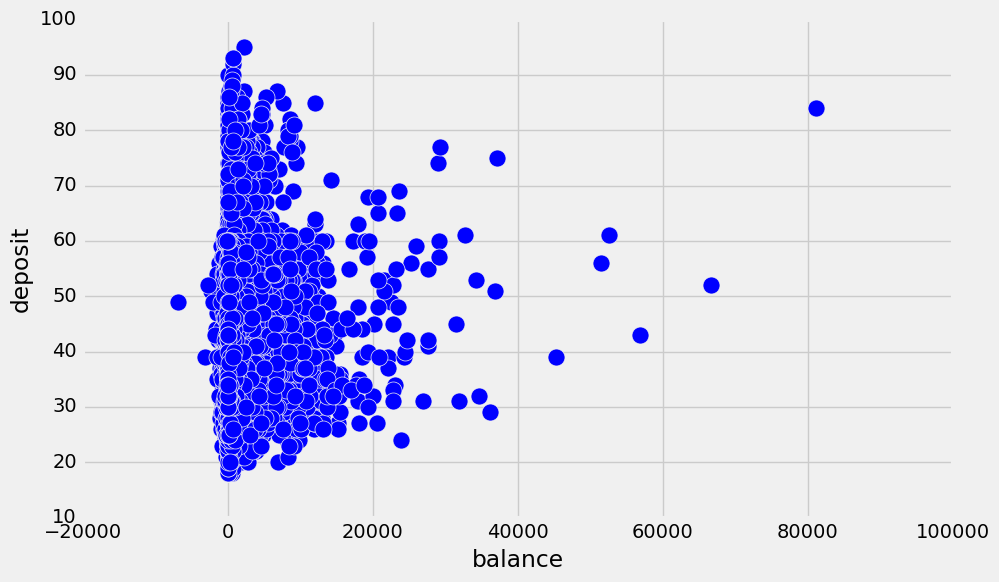

In [18]:
#6. do some exploratory data analysis
#Plot balance vs age
plt.scatter(df.balance, 
df.age,
           s=150)
plt.xlabel('balance')
plt.ylabel('age')

In [19]:
#7. do some exploratory data analysis
#Plot balance vs default
plt.scatter(df.balance, 
df.default,
           s=150)
plt.xlabel('balance')
plt.ylabel('default')

ValueError: could not convert string to float: 'no'

ValueError: could not convert string to float: 'no'

In [ ]:
#8. Label encoding

In [28]:
#import preprocessing library
#import scikit learn
from sklearn import preprocessing

In [34]:
df_encoded = df.apply(preprocessing.LabelEncoder().fit_transform)

In [38]:
#9. View first few records of df_encoded
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


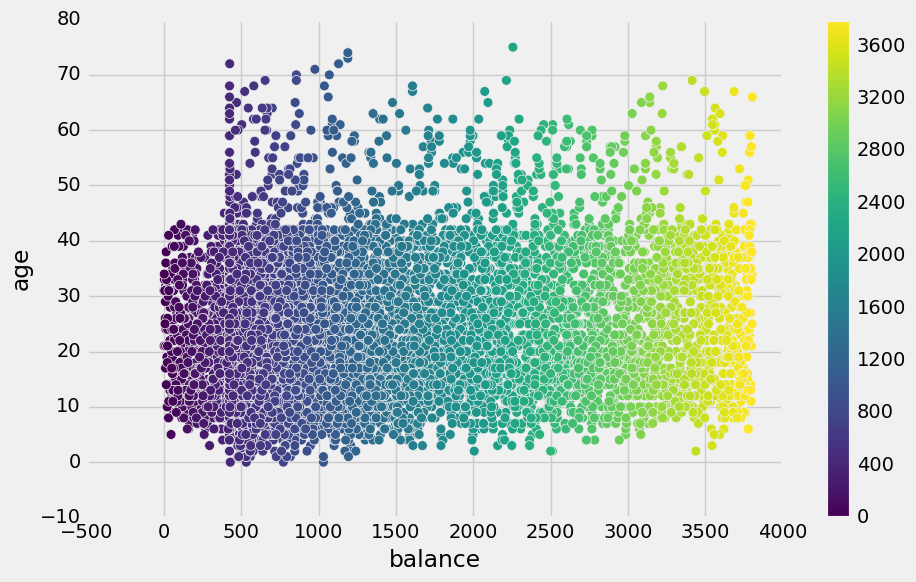

In [51]:
#10. Plot balance vs default
#c is the color
#user color map is based on plt.cm.viridis
df_encoded.plot(kind="scatter", x = "balance", y = "age", c=df_encoded.balance, s=50, cmap=plt.cm.viridis)

# Linear Regression

In [72]:
#11. Select balance, default, loan, previous, deposit

df_subset = df_encoded[["balance", "default", "loan", "previous", "deposit"]]

In [73]:
df_sun = df_encoded

In [74]:
df_sun.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


In [75]:
#12. View first few records of df_subset
df_subset.head()

,balance,default,loan,previous,deposit
0,2288,0,0,0,1
1,469,0,0,0,1
2,1618,0,0,0,1
3,2356,0,0,0,1
4,608,0,0,0,1


**Task** Use balance, default, loan, previous to build a model to predict deposit

In [76]:
#11. import linear regression
from sklearn.linear_model import LinearRegression

In [77]:
?LinearRegression

In [78]:
#12. The first thing is to instantiate the linear regression
model_linear_reg = LinearRegression()

In [79]:
#13. Define and X and y for model
#iloc tells all the rows and columns
#instantiation process
X = df_subset.iloc[:, :4]
y = df_subset.iloc[:, 4]

In [80]:
?model_linear_reg.fit

In [81]:
#13. Fit the model
model_linear_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [82]:
#14. Display coefficients of the model
#this is the w
model_linear_reg.coef_

array([  6.24765664e-05,  -6.25958899e-02,  -1.33381863e-01,
         3.17295357e-02])

In [36]:
#15. Let's see how to use it for classification
#Predict on the training dataset itself
#(in reality - you wouldn't do this - we will cover that later)

In [83]:
#defining the prediction 
linear_reg_prediction = model_linear_reg.predict(X)

In [84]:
linear_reg_prediction

array([ 0.52608204,  0.41243716,  0.48422274, ...,  0.41143754,
        0.43489153,  0.40962572])

In [85]:
#16. What's one issue with this?
#output should be '0' or '1'
print("Max Prediction:", linear_reg_prediction.max(),  "\n"
      "Min Prediction:", linear_reg_prediction.min())

Max Prediction: 1.52932384722 
Min Prediction: 0.187157901991


In [43]:
#17. Let's classify anything above 0.5 as 1 and below 0.5 as 1

In [88]:
#creating a duplicate
linear_reg_prediction_updated = linear_reg_prediction.copy()

In [86]:
np.where?

In [89]:
#Set predictions above 0.5 as 1
linear_reg_prediction_updated[np.where(linear_reg_prediction_updated>0.5)] = 1

In [90]:
#Set predictions below 0.5 as 0
linear_reg_prediction_updated[np.where(linear_reg_prediction_updated<=0.5)] = 0

In [91]:
#check if transformation happened correctly. 
#Check unique values in the new prediction dataset
np.unique(linear_reg_prediction_updated)

array([ 0.,  1.])

In [95]:
#18. Find mis-classification rate
predictions = pd.DataFrame({"actual":y, "predicted": linear_reg_prediction_updated})

In [96]:
predictions.head()

,actual,predicted
0,1,1.0
1,1,0.0
2,1,0.0
3,1,1.0
4,1,0.0


In [113]:
predictions["correctlyClassified"] = (predictions.actual == predictions.predicted)

In [114]:
predictions.head()

,actual,predicted,correctlyClassified
0,1,1.0,True
1,1,0.0,False
2,1,0.0,False
3,1,1.0,True
4,1,0.0,False


In [115]:
#19. compute mis-classification rate
#mis-classification rate is: # of correctly classified divided by number of rows
np.sum(predictions.correctlyClassified)/predictions.shape[0]*100

60.320731051782836

In [107]:
predictions.shape

(11162, 3)

In [105]:
predictions.actual.value_counts()

0    5873
1    5289
Name: actual, dtype: int64

In [102]:
predictions.predicted.value_counts()

0.0    7354
1.0    3808
Name: predicted, dtype: int64

In [100]:
predictions.correctlyClassified.value_counts()

False    8828
True     2334
Name: correctlyClassified, dtype: int64

In [109]:
(2334)/(5289 + 5873)

0.20910231141372515

### 20. Exercise

1. Use all the features and build the model.
2. Look into the coefficients
3. Predict on the training dataset itself (We will look into how to evaluate this later today)
4. Report mis-classification rate
5. Use normalization in linear regression and do the same process
6. Use accuracy_score from sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score




In [118]:
#11. import sklearn metrics
from sklearn.metrics import accuracy_score

In [119]:
accuracy_score(y, linear_reg_prediction_updated)

0.60320731051782839